In [126]:
FILE_PATH = "../data/superstore_dataset.csv"

In [127]:
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import warnings

# for later exploration
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

In [128]:
sales_raw = pd.read_csv(FILE_PATH)
sales_raw.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,11/8/2020,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,11/8/2020,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,6/12/2020,6/16/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,10/11/2019,10/18/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,10/11/2019,10/18/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [129]:
sales_raw.info()
sales_raw.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

<bound method NDFrame.head of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2020-152156   11/8/2020  11/11/2020    Second Class   
1          2  CA-2020-152156   11/8/2020  11/11/2020    Second Class   
2          3  CA-2020-138688   6/12/2020   6/16/2020    Second Class   
3          4  US-2019-108966  10/11/2019  10/18/2019  Standard Class   
4          5  US-2019-108966  10/11/2019  10/18/2019  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2018-110422   1/21/2018   1/23/2018    Second Class   
9990    9991  CA-2021-121258   2/26/2021    3/3/2021  Standard Class   
9991    9992  CA-2021-121258   2/26/2021    3/3/2021  Standard Class   
9992    9993  CA-2021-121258   2/26/2021    3/3/2021  Standard Class   
9993    9994  CA-2021-119914    5/4/2021    5/9/2021    Second Class   

     Customer ID     Customer Name    Segment Country/Region             City  \
0       CG-12520       C

In [130]:
sales_raw.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [131]:
sales = sales_raw.copy()
sales = sales.drop("Postal Code", axis = 1) #axis=1 for column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Region          9994 non-null   object 
 12  Product ID      9994 non-null   object 
 13  Category        9994 non-null   object 
 14  Sub-Category    9994 non-null   object 
 15  Product Name    9994 non-null   object 
 16  Sales           9994 non-null   float64
 17  Quantity        9994 non-null   i

In [132]:
warnings.filterwarnings('ignore')
sales['Order Date'] = pd.to_datetime(sales['Order Date'], dayfirst=True)
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], dayfirst=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Region          9994 non-null   object        
 12  Product ID      9994 non-null   object        
 13  Category        9994 non-null   object        
 14  Sub-Category    9994 non-null   object        
 15  Prod

In [133]:
#Get only order date, sales, and profit
sales = sales.loc[:, ["Order Date", "Sales", "Profit"]]

#Set date column to index
sales.set_index('Order Date', inplace = True)

In [134]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2020-08-11 to 2021-04-05
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   9994 non-null   float64
 1   Profit  9994 non-null   float64
dtypes: float64(2)
memory usage: 234.2 KB
None


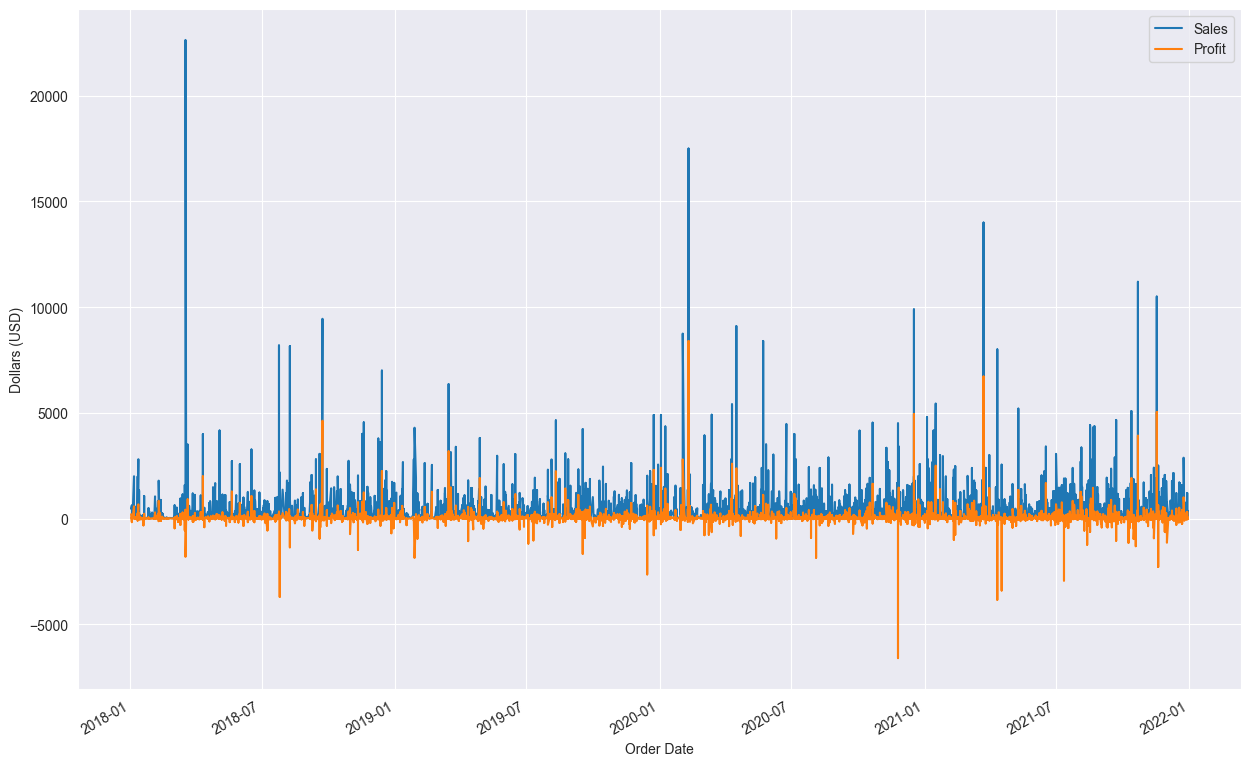

In [135]:
ax = sales.plot()
plt.gcf().set_size_inches(15, 10)
ax.set_ylabel("Dollars (USD)")
plt.show()

In [136]:
sales_by_year = pd.DataFrame()

for year in ["2018", "2019", "2020", "2021"]:
    temp_year = sales.loc[year, ["Sales"]].reset_index(drop = True)
    temp_year.rename(columns={"Sales": year}, inplace = True)
    sales_by_year = pd.concat([sales_by_year, temp_year], axis=1)

sales_by_year

,2018,2019,2020,2021
0,48.860,957.5775,261.960,15.552
1,7.280,22.3680,731.940,71.372
2,907.152,68.8100,14.620,29.472
3,18.504,2.5440,407.976,147.168
4,114.900,1044.6300,19.460,95.616
...,...,...,...,...
3307,NaN,NaN,NaN,206.100
3308,NaN,NaN,NaN,91.960
3309,NaN,NaN,NaN,258.576
3310,NaN,NaN,NaN,29.600


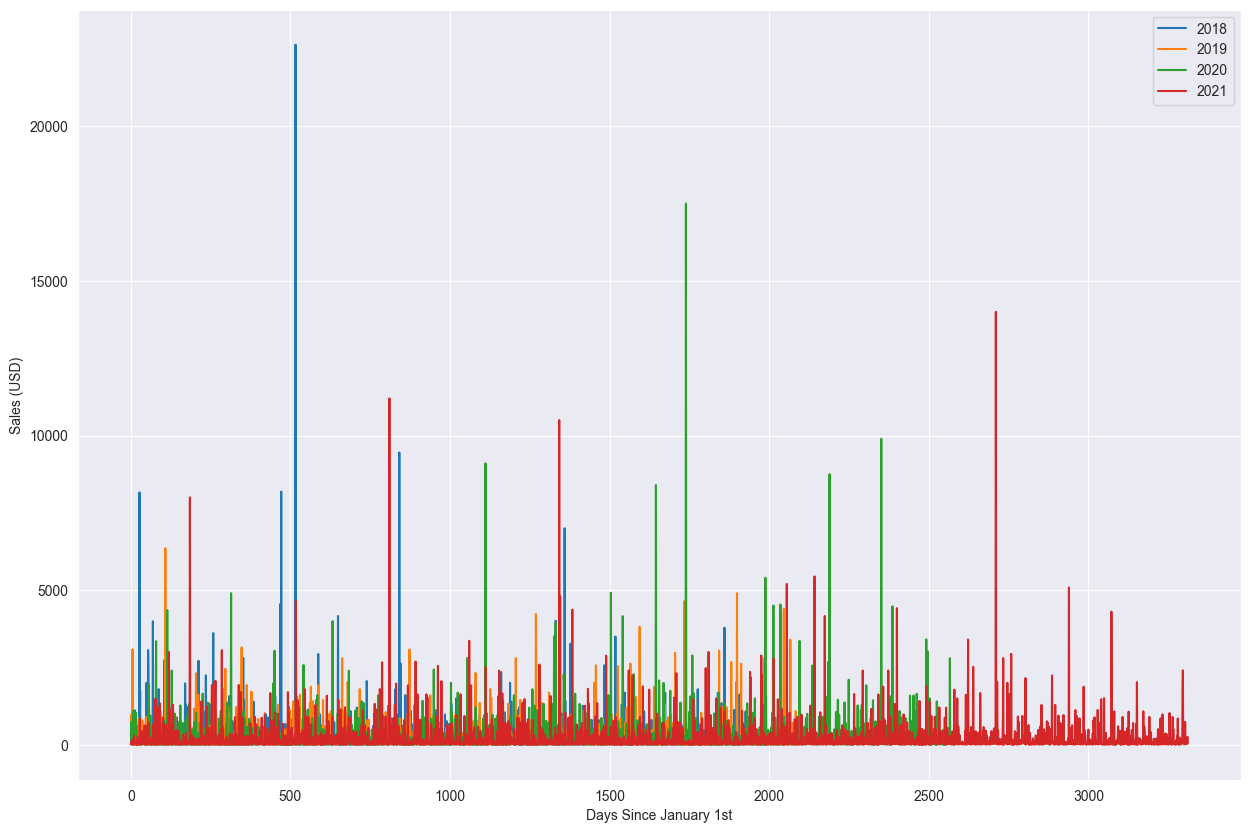

In [137]:
sales_by_year.plot()
plt.gcf().set_size_inches(15, 10)
plt.ylabel("Sales (USD)")
plt.xlabel("Days Since January 1st")
plt.show()

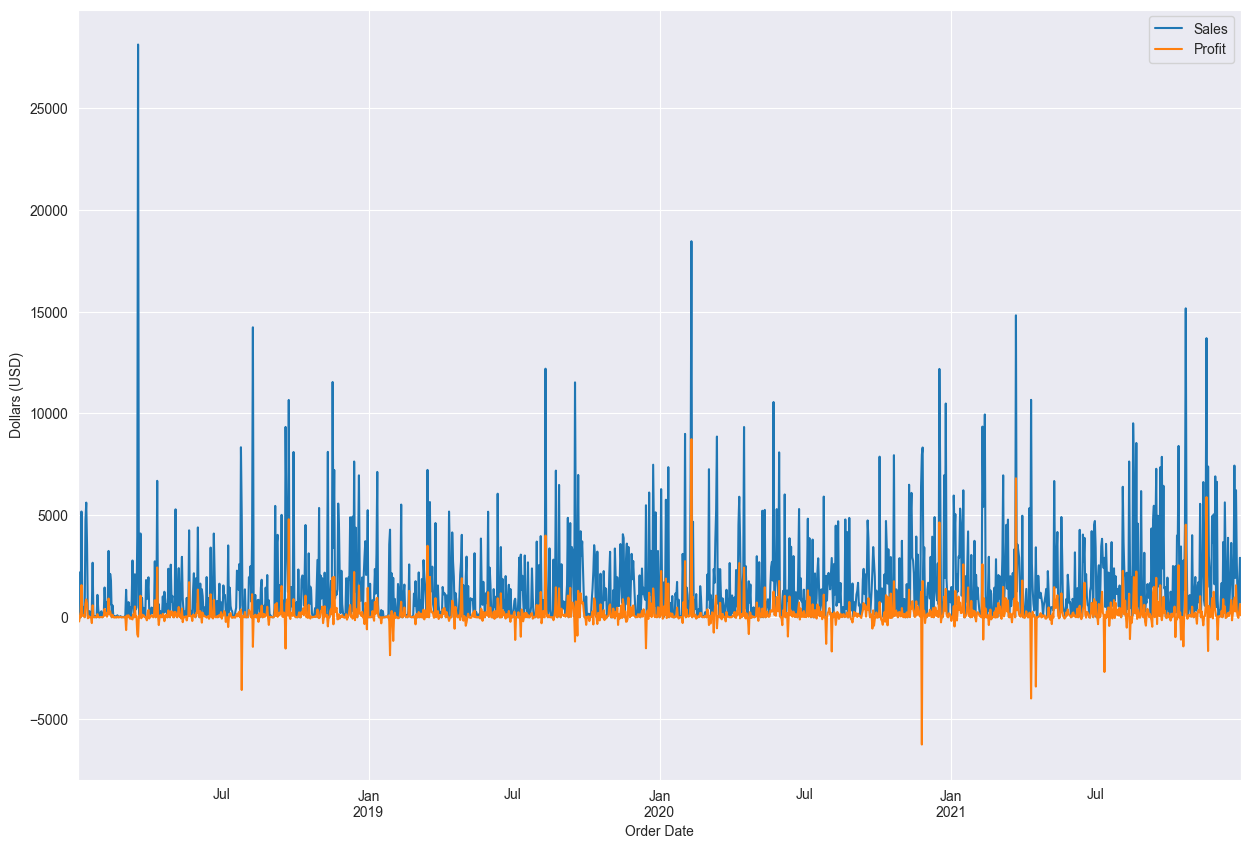

In [138]:
daily_sales = sales.groupby(pd.Grouper(freq='D')).sum()
daily_sales.plot()
plt.gcf().set_size_inches(15, 10)
plt.ylabel("Dollars (USD)")
plt.show()

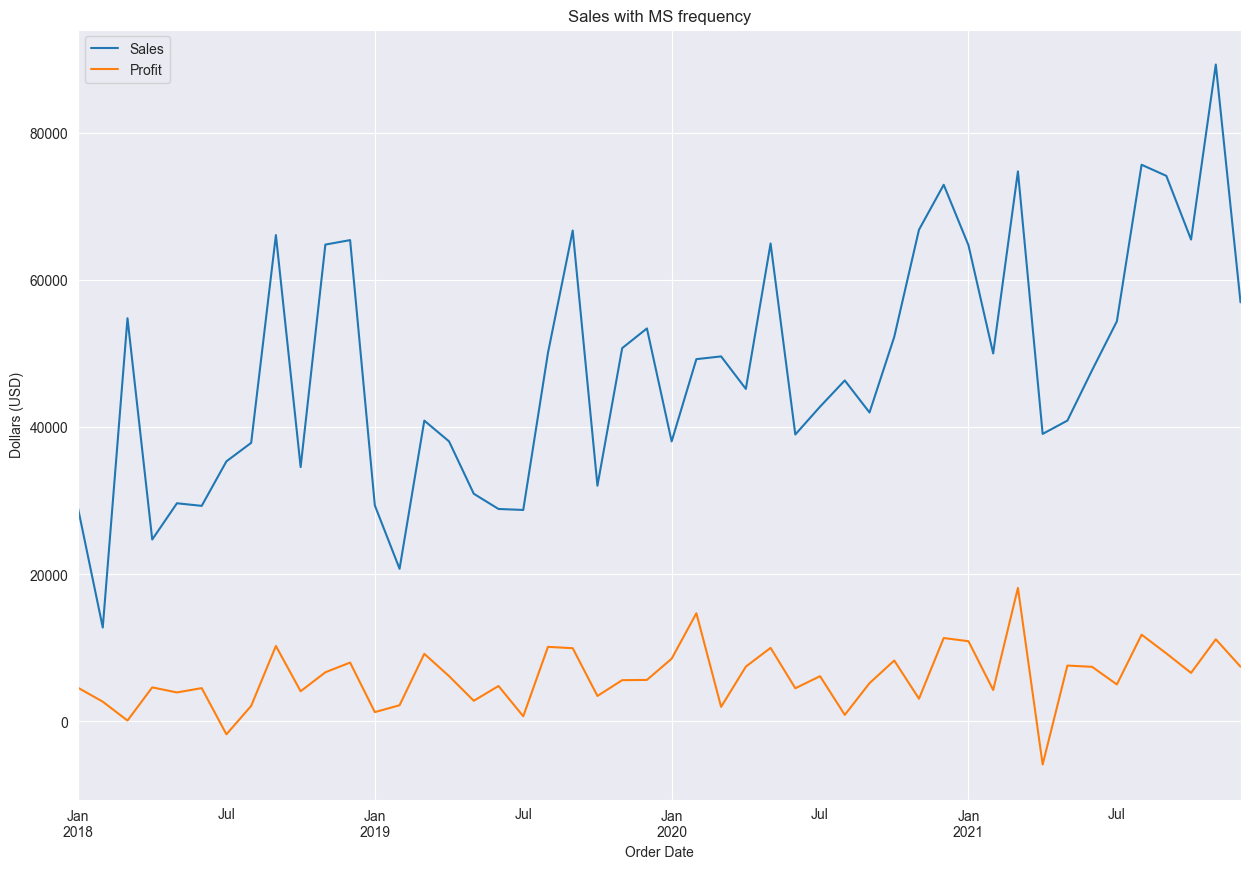

In [139]:
monthly_sales = sales.groupby(pd.Grouper(freq='MS')).sum()
monthly_sales.plot()
plt.gcf().set_size_inches(15, 10)
plt.title("Sales with MS frequency")
plt.ylabel("Dollars (USD)")
plt.show()

In [140]:
yearly_sales = sales.groupby(pd.Grouper(freq='YS')).sum()
yearly_sales

,Sales,Profit
Order Date,,
2018-01-01,484247.4981,49543.9741
2019-01-01,470532.5090,61618.6037
2020-01-01,609205.5980,81795.1743
2021-01-01,733215.2552,93439.2696


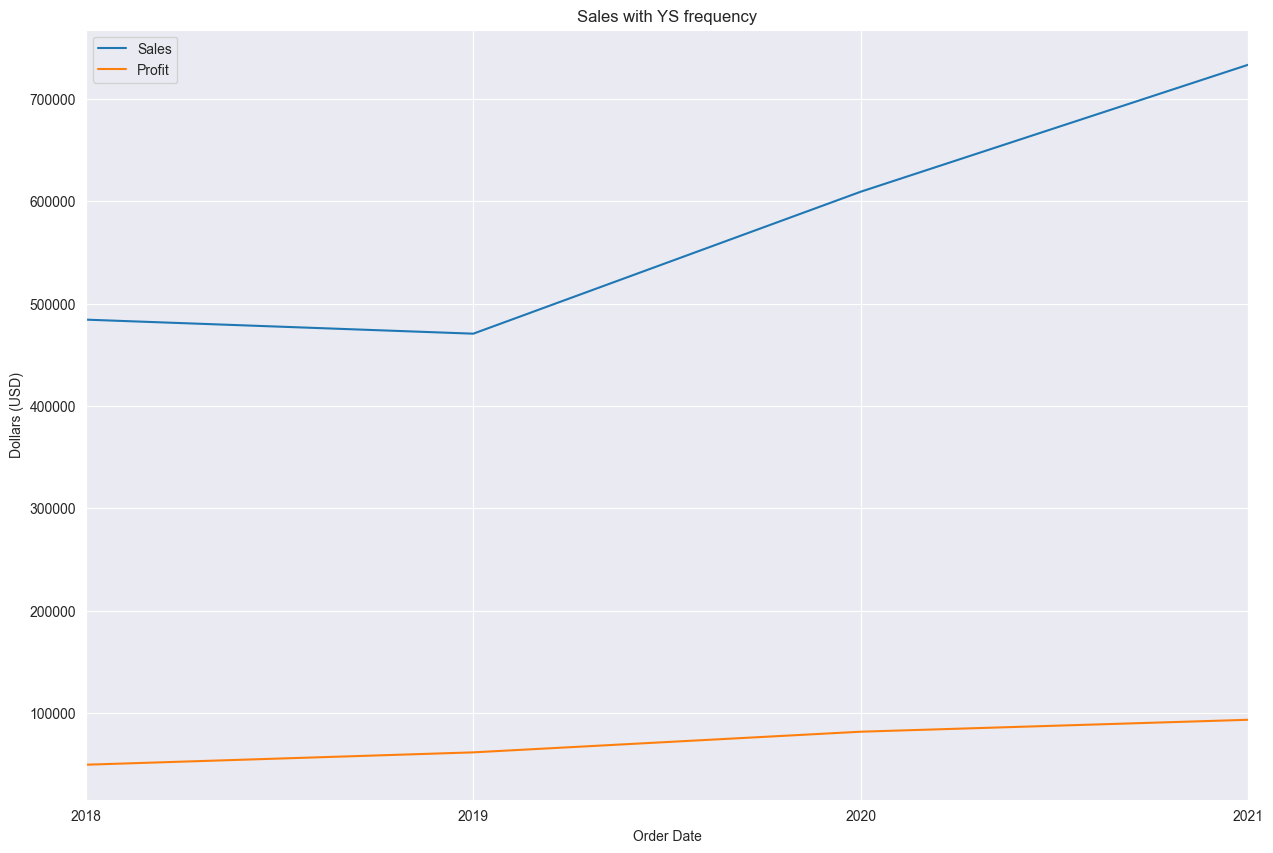

In [141]:
yearly_sales.plot()
plt.gcf().set_size_inches(15, 10)
plt.title("Sales with YS frequency")
plt.ylabel("Dollars (USD)")
plt.show()

In [142]:
#Create empty dataframe to store yearly data
monthly_sales_by_year = pd.DataFrame()

for year in ["2018", "2019", "2020", "2021"]:
    temp_year = monthly_sales.loc[year, ["Sales"]].reset_index(drop = True)
    temp_year.rename(columns={"Sales": year}, inplace = True)
    monthly_sales_by_year = pd.concat([monthly_sales_by_year, temp_year], axis=1)

monthly_sales_by_year

,2018,2019,2020,2021
0,28953.7060,29347.3864,38048.1840,64734.3110
1,12743.1080,20728.3520,49238.4100,50011.4894
2,54801.9060,40876.6112,49612.0450,74774.0838
3,24710.0160,38056.9685,45192.2780,39072.0016
4,29639.8340,30933.7145,64964.3218,40882.4464
5,29287.0306,28862.1982,38991.9430,47742.3255
6,35341.2460,28730.3760,42773.3950,54382.0875
7,37854.5475,50094.5280,46339.9884,75675.3040
8,66110.2238,66729.3290,41985.1423,74164.6080
9,34561.9470,32025.0750,52268.1500,65501.1622


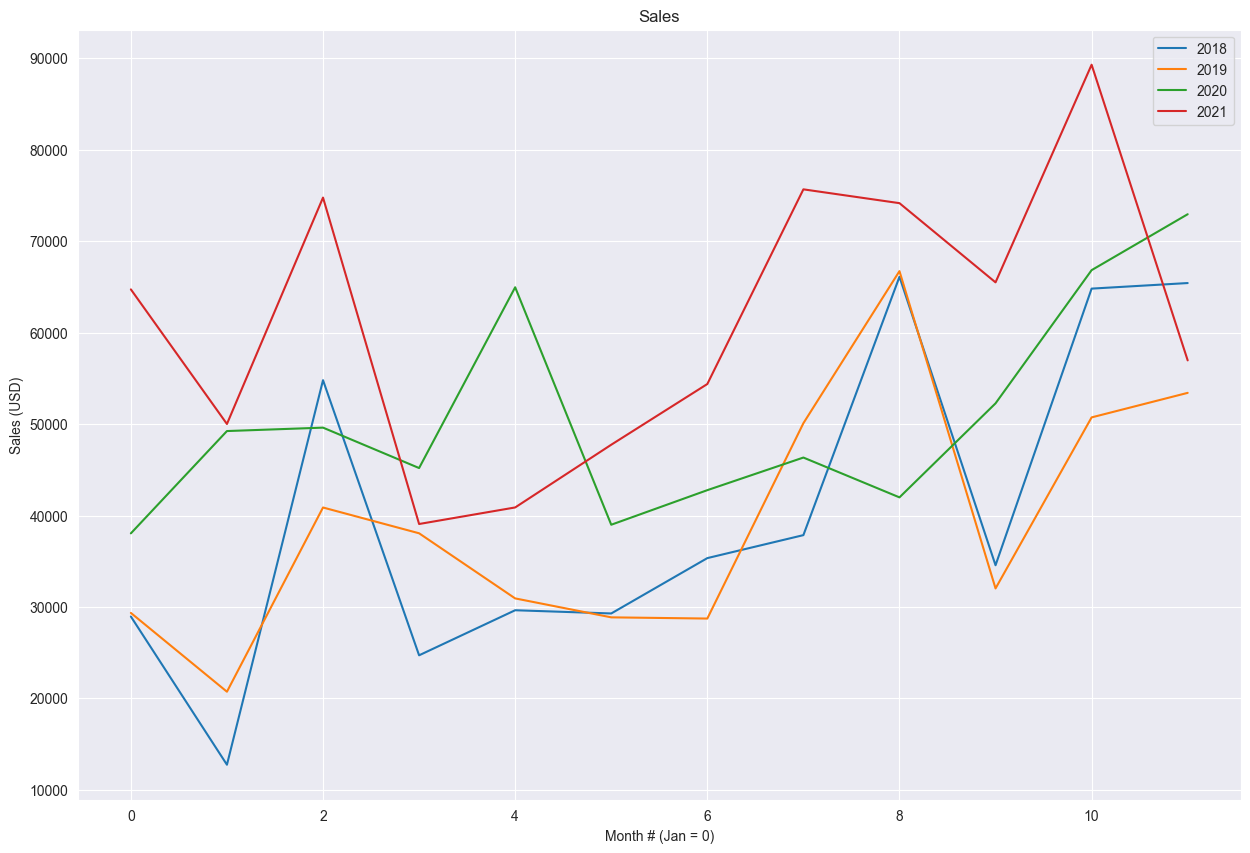

In [143]:
monthly_sales_by_year.plot()
plt.gcf().set_size_inches(15, 10)
plt.title("Sales")
plt.ylabel("Sales (USD)")
plt.xlabel("Month # (Jan = 0)")
plt.show()

In [144]:
sales['365D_sales'] = sales.Sales.rolling(365).mean()
sales['365D_profit'] = sales.Profit.rolling(365).mean()
sales

,Sales,Profit,365D_sales,365D_profit
Order Date,,,,
2020-08-11,261.9600,41.9136,NaN,NaN
2020-08-11,731.9400,219.5820,NaN,NaN
2020-12-06,14.6200,6.8714,NaN,NaN
2019-11-10,957.5775,-383.0310,NaN,NaN
2019-11-10,22.3680,2.5164,NaN,NaN
...,...,...,...,...
2018-01-21,25.2480,4.1028,231.797688,21.577765
2021-02-26,91.9600,15.6332,230.926347,21.884898
2021-02-26,258.5760,19.3932,231.609438,21.928845


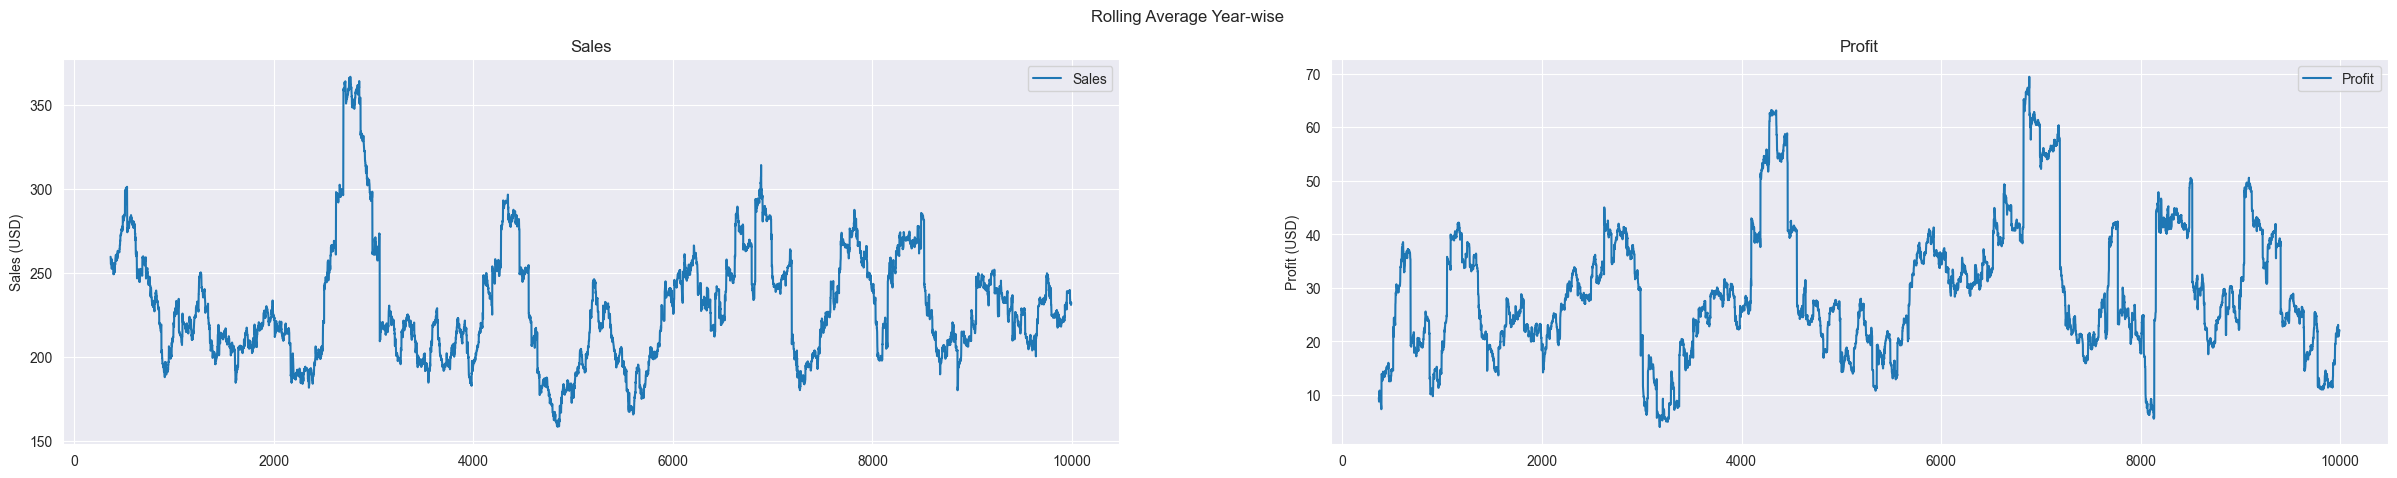

In [145]:
fig, axes = plt.subplots(1, 2)
sales = sales.reset_index(drop=True)
sns.lineplot(ax = axes[0], x = sales.index, y = '365D_sales', data = sales, label = 'Sales', )
sns.lineplot(ax = axes[1], x = sales.index, y = '365D_profit', data = sales, label = 'Profit', palette='r')

fig.suptitle('Rolling Average Year-wise')
plt.gcf().set_size_inches(30, 5)
plt.subplots_adjust(hspace=0.5)
axes[0].set_title('Sales')
axes[1].set_title('Profit')
axes[0].set_ylabel("Sales (USD)")
axes[1].set_ylabel("Profit (USD)")
plt.show()

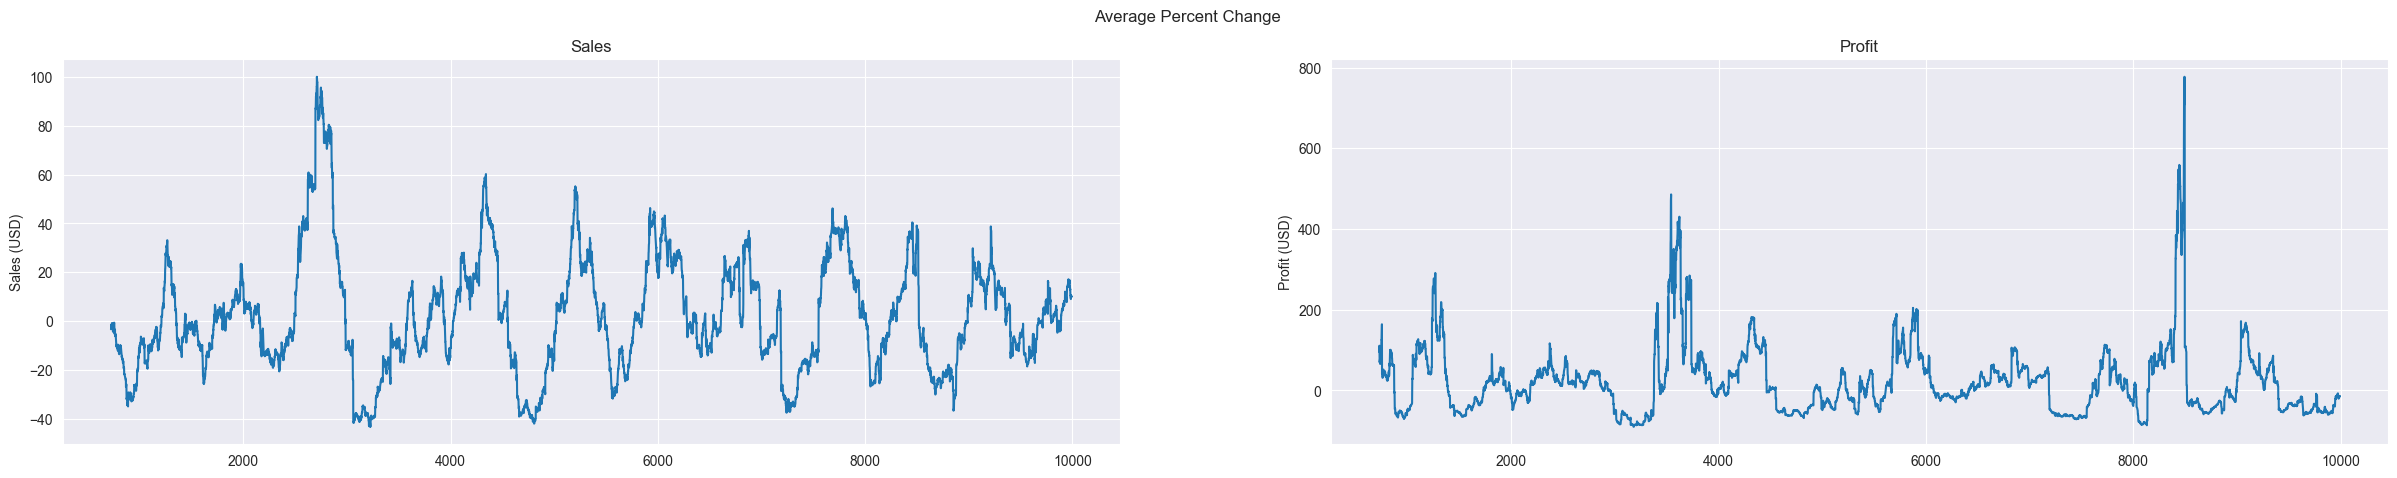

In [146]:
fig, axes = plt.subplots(1, 2)
sales['percent_sales_yearly'] = sales['365D_sales'].pct_change(periods = 360).mul(100)
sales['percent_profit_yearly'] = sales['365D_profit'].pct_change(periods = 360).mul(100)
sns.lineplot(ax = axes[0], x = sales.index, y = 'percent_sales_yearly', data = sales)
sns.lineplot(ax = axes[1], x = sales.index, y = 'percent_profit_yearly', data = sales)

fig.suptitle('Average Percent Change')
plt.gcf().set_size_inches(30, 5)
plt.subplots_adjust(hspace=0.5)
axes[0].set_title('Sales')
axes[1].set_title('Profit')
axes[0].set_ylabel("Sales (USD)")
axes[1].set_ylabel("Profit (USD)")
plt.show()

<AxesSubplot: >

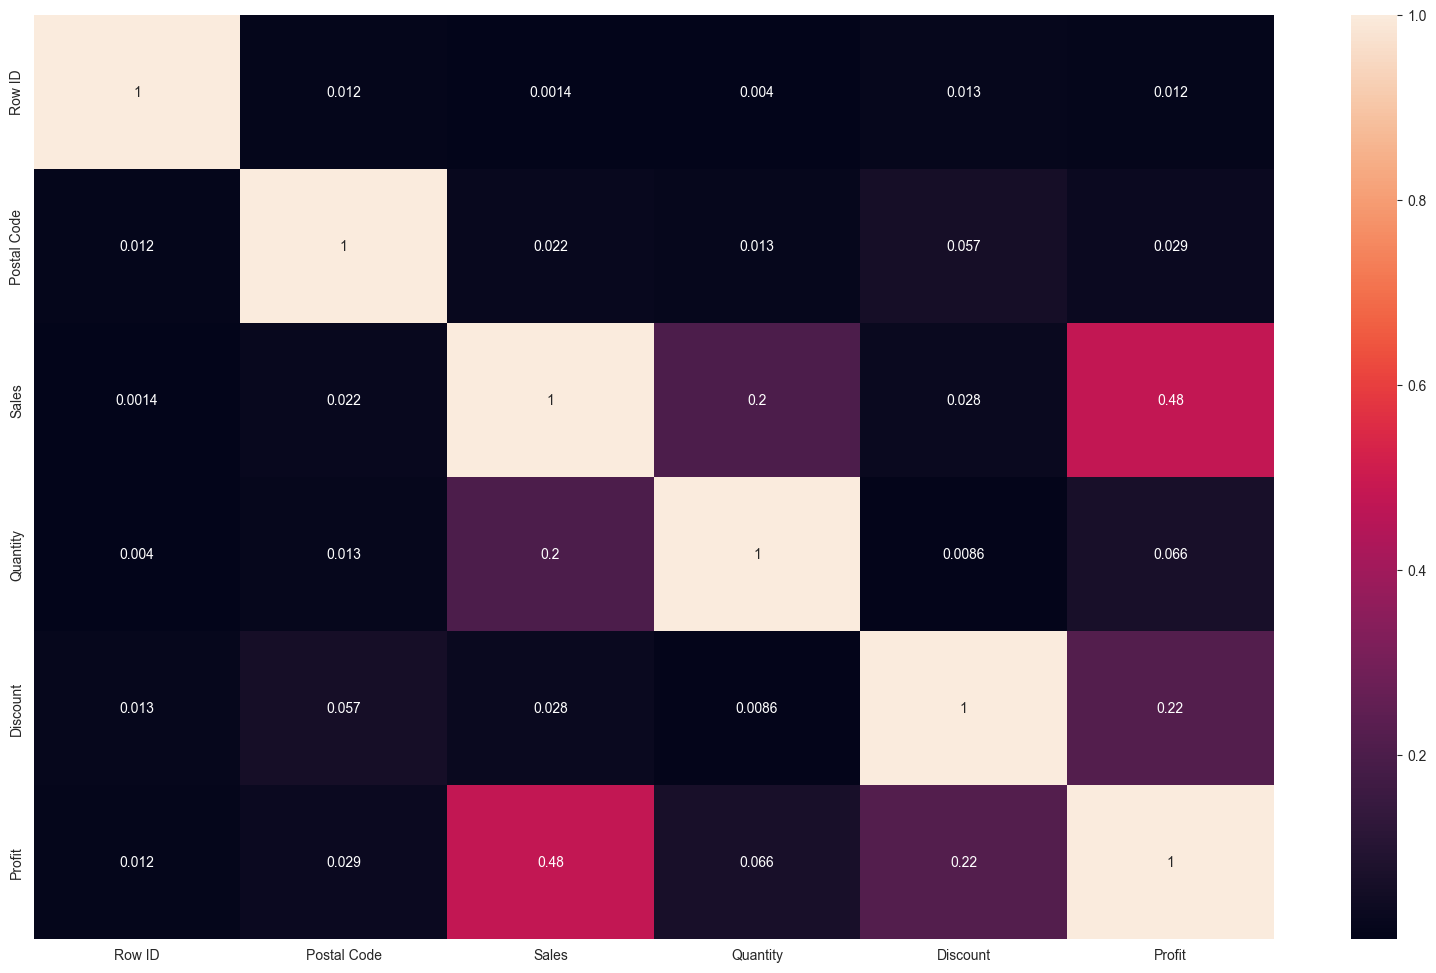

In [147]:
plt.subplots(figsize=(20,12))
sns.heatmap(sales_raw.corr().abs(), annot=True)

In [148]:
sales_analysis = sales_raw.copy()
X = sales_analysis.filter(['Quantity','Discount','Profit'])
y= sales_analysis.Sales

In [149]:
X.shape

(9994, 3)

In [150]:
X.head()

,Quantity,Discount,Profit
0,2,0.00,41.9136
1,3,0.00,219.5820
2,2,0.00,6.8714
3,5,0.45,-383.0310
4,2,0.20,2.5164


In [151]:
y.head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [153]:
columns=X_train.columns

In [154]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [156]:
regressor.intercept_

-7501.33489542078

In [157]:
regressor.coef_

array([  596.21340095,   170.90351822, 15209.65300499])

In [158]:
y_pred_train = regressor.predict(X_train)

In [159]:
y_pred = regressor.predict(X_test)

In [160]:
mean_squared_error(y_test, y_pred)

249759.48182832054

In [161]:
math.sqrt(mean_squared_error(y_test, y_pred))

499.7594239514854

In [162]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.18835034893816938

In [163]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.4096535718080949

In [164]:
train_score_3=regressor.score(X_train, y_train)
test_score_3=regressor.score(X_test, y_test)

print("Regression Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

Regression Model Score : 0.18835034893816938 , Test Score : 0.4096535718080949


In [165]:
simple_lr_pred = y_pred[:300]
simple_lr_real = y_test[:300]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred})

In [166]:
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

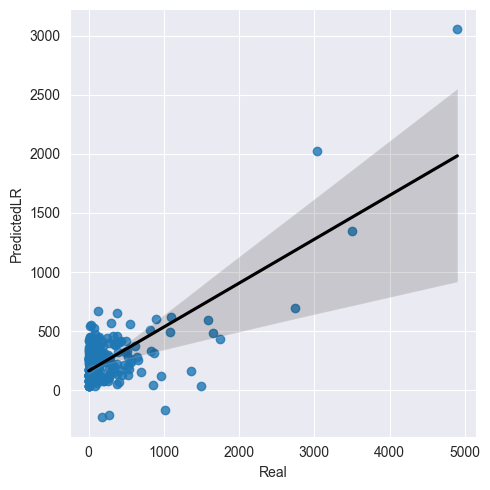

In [167]:
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

In [168]:
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

In [169]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [170]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regression Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regression Model Score : 0.9984184561490828 , Test Score : 0.37183180544195693
Training RMSE : 24.303276781484936 Testing RMSE : 515.519970723149
Training MAPE : 3.247678878363442 Testing MAPE : 70.62452259404844


In [171]:
dc_pred = y_test_predicted[:300]
dc_real = y_test[:300]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred})

In [172]:
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

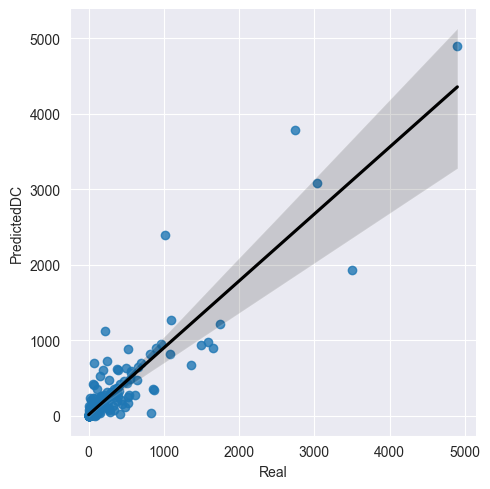

In [173]:
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'})

TODO Manual Config and ARIMA Projections....